In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.02638941,  0.14541566, -0.42366229, -0.48426166, -0.49369446,
        -0.80763709,  0.29453952, -0.66942904,  1.18156423, -1.63465699],
       [-0.71463126, -0.4003563 , -0.81787606,  0.98831884,  1.56860166,
         0.17394529,  0.17920538, -0.7333224 , -0.42568803, -0.67742736]])

In [4]:
test_Features[:2]

array([[ 0.86820108,  0.24105726,  0.19802321, -0.93883611, -0.87828237,
         0.86259559,  1.77763978, -0.97248435, -0.37451754, -0.04813375],
       [-0.08717252, -0.14425639,  0.07592908, -0.73151515, -0.71449316,
         0.07029947,  0.70626311,  0.72302072, -0.74842952,  0.9355833 ]])

In [5]:
train_Label[:4]

array([0, 1, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 1, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=20*5,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=20*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=20*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=20*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 17,321
Trainable params: 17,321
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 1s - loss: 0.6846 - acc: 0.6460 - val_loss: 0.6373 - val_acc: 0.6682
Epoch 2/30
 - 0s - loss: 0.5266 - acc: 0.7081 - val_loss: 0.4385 - val_acc: 0.8134
Epoch 3/30
 - 0s - loss: 0.4200 - acc: 0.8111 - val_loss: 0.3786 - val_acc: 0.8318
Epoch 4/30
 - 0s - loss: 0.3729 - acc: 0.8407 - val_loss: 0.3719 - val_acc: 0.8417
Epoch 5/30
 - 0s - loss: 0.3560 - acc: 0.8520 - val_loss: 0.3586 - val_acc: 0.8509
Epoch 6/30
 - 0s - loss: 0.3475 - acc: 0.8563 - val_loss: 0.3641 - val_acc: 0.8495
Epoch 7/30
 - 0s - loss: 0.3425 - acc: 0.8583 - val_loss: 0.3461 - val_acc: 0.8535
Epoch 8/30
 - 0s - loss: 0.3380 - acc: 0.8618 - val_loss: 0.3429 - val_acc: 0.8502
Epoch 9/30
 - 0s - loss: 0.3321 - acc: 0.8618 - val_loss: 0.3366 - val_acc: 0.8561
Epoch 10/30
 - 0s - loss: 0.3276 - acc: 0.8632 - val_loss: 0.3330 - val_acc: 0.8614
Epoch 11/30
 - 0s - loss: 0.3257 - acc: 0.8657 - val_loss: 0.3307 - val_acc: 0.8640
Epoch 12/30
 - 0s - loss: 0.3226 - a

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

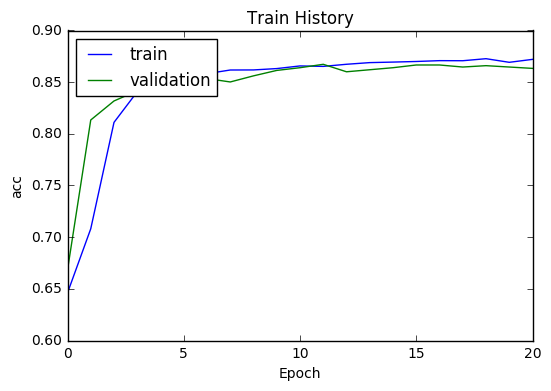

In [20]:
show_train_history(train_history,'acc','val_acc')

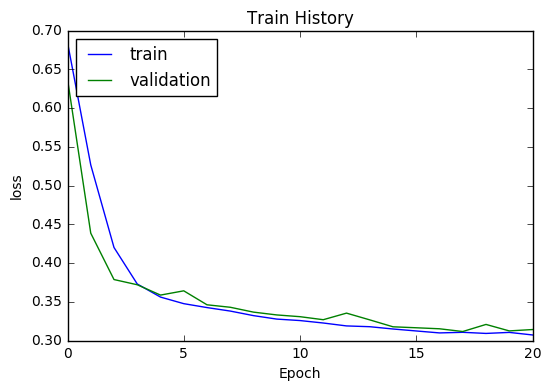

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 19us/step


In [23]:
scores[1]

0.8633017875293326